In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [15]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [16]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
#df = df.dropna()

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications
0,CdIF-1,1.8077,3.92,3.93,1.002551,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,627.0,596.0,72.0
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,2.76,2.89,5.000000e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [17]:
df=df[['type', 'aperture', 'aperture2', 'ionicRad', 'linker_length1', 'linker_length2', 'linker_length3', 'func1_length', 'func2_length', 'func3_length', 'func1_mass', 'func2_mass', 'func3_mass', 'apertureAtom_σ', 'apertureAtom_e', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'size - van der Waals (Å)', 'size - kinetic diameter (Å)', 'mass', 'ascentricF'  ]]
df = df.dropna()
df.head(5)

,type,aperture,aperture2,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3,size - van der Waals (Å),size - kinetic diameter (Å),mass,ascentricF
0,CdIF-1,3.92,3.93,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0,2.66,2.6,4.002,-0.390
3,CdIF-1,3.92,3.97,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0,3.24,3.3,44.010,0.225
5,CdIF-1,3.92,4.08,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0,3.25,3.8,16.040,0.011
6,CdIF-1,3.92,4.11,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0,3.59,3.9,28.050,0.087
7,CdIF-1,3.92,4.11,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.0,81.0,81.0,3.72,4.0,30.070,0.099


# Bring my data into shape

In [18]:
df=df.drop_duplicates(subset=['type'], keep='first')
df

,type,aperture,aperture2,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3,size - van der Waals (Å),size - kinetic diameter (Å),mass,ascentricF
0,CdIF-1,3.92000,3.93000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.39
11,ZIF-8,3.46000,3.47000,74,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.39
23,ZIF-Cu,3.20000,3.26000,71,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.39
34,ZIF-67,3.32000,3.36000,72,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.39
45,BeIF-1,2.88000,2.88000,41,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,dIm_Be,2.75316,2.76198,41,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39
805,dIm_Co,2.91071,2.92661,72,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39
817,dIm_Cu,2.89378,2.90368,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39
829,dIm_Cd,2.99000,3.00007,92,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39


In [19]:
df=df.rename(columns={'linker_length3':'linker3', 'func3_length':'func3G', 'linker_length2':'linker2', 'func2_length':'func2G', 'linker_length1':'linker1', 'func1_length':'func1G', 'apertureAtom_σ':'σ', 'apertureAtom_e':'e', 'linker_mass1.1':'linker_mass2', 'size - van der Waals (Å)':'vdW', 'size - kinetic diameter (Å)':'kinDiam' })

# I sort my data

In [20]:
df=df.sort_values(by = ['linker1', 'func1G', 'ionicRad'], ascending = True)
df.reset_index(drop=True)
df.head(3)

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
265,tetr-ZIF8_Be,3.39,3.40000,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.6,4.002,-0.39
517,tetr-ZIF8_Cu,3.60,3.61166,71,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.6,4.002,-0.39
277,tetr-ZIF8_Co,3.77,3.78900,72,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.6,4.002,-0.39


In [21]:
df=df.reset_index(drop=True)
df.tail(3)

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
68,dIm_Co,2.91071,2.92661,72,6.41,6.41,6.41,3.78,3.78,3.78,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39
69,dIm_Zn,2.90000,2.91908,74,6.41,6.41,6.41,3.78,3.78,3.78,15.0,15.0,15.0,0.367,2.4267,317.800,317.800,317.800,2.66,2.6,4.002,-0.39
70,dIm_Cd,2.99000,3.00007,92,6.41,6.41,6.41,3.78,3.78,3.78,15.0,15.0,15.0,0.340,1.2552,134.906,134.906,134.906,2.66,2.6,4.002,-0.39


In [22]:
# x = np.asanyarray(df[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
# y = np.asanyarray(df[['aperture']])
x1 = (df[['ionicRad', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e']])
y1 = (df[['aperture']])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=100)

In [24]:
# regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
regr = MLPRegressor(hidden_layer_sizes=(100), solver='lbfgs', random_state=50, max_iter=1600)

In [25]:
regr.fit(x_train, y_train.values.ravel())

MLPRegressor(hidden_layer_sizes=100, max_iter=1600, random_state=50,
             solver='lbfgs')

In [26]:
y_regr=regr.predict(x_test)

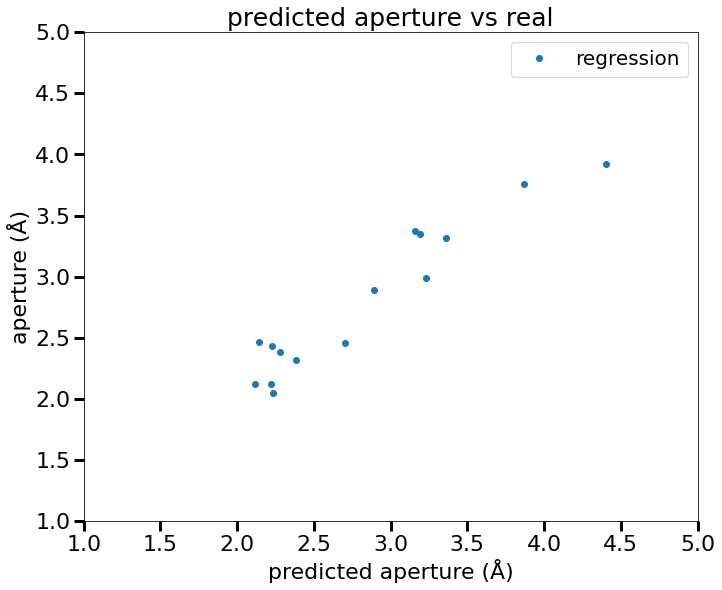

In [27]:
plt.plot(y_regr, y_test, 'o', label='regression')
plt.title ('predicted aperture vs real',fontsize=25)
plt.xlabel('predicted aperture (Å)', fontsize=22)
plt.ylabel('aperture (Å)',fontsize=22)
plt.legend(loc='upper right', fontsize=20)

plt.ylim(1, 5)
plt.xlim(1, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (11,9)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [28]:
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

metrics.r2_score(y_test, y_regr)

0.880064650590259

In [29]:
df[(df['type'] == 'Mg-I-zif-7-8')]['aperture']

22    2.3
Name: aperture, dtype: float64